Un análisis bivariado permite estudiar cómo se relacionan dos variables. En este caso, se seleccionaron las variables Knee_Strength_Score y Injury_Next_Season.

- Knee_Strength_Score: se eligió porque la fuerza de la rodilla es un factor clave en el riesgo de lesión, siendo una de las zonas más vulnerables y comunes de lesión en jugadores.
- Injury_Next_Season (variable objetivo): se seleccionó porque representa el resultado que se busca predecir, es decir, si el jugador tendrá una lesión en la próxima temporada.

La elección de estas variables busca determinar si existe algún tipo de relación entre la fuerza de la rodilla y la probabilidad de lesión futura, lo cual podría indicar que la fuerza en la rodilla es un factor relevante al momento de predecir el riesgo de lesión.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

In [3]:

# Download latest version
path = kagglehub.dataset_download("yuanchunhong/university-football-injury-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/santiagoaristizabal/.cache/kagglehub/datasets/yuanchunhong/university-football-injury-prediction-dataset/versions/2


In [4]:
print(os.listdir(path))

['data.csv']


In [5]:
df = pd.read_csv(os.path.join(path, "data.csv"))

df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [8]:
df[['Knee_Strength_Score','Injury_Next_Season']].describe().round(2).transpose()[['count','mean','std','min','max']]

,count,mean,std,min,max
Knee_Strength_Score,800.0,74.93,6.67,52.39,93.9
Injury_Next_Season,800.0,0.50,0.50,0.00,1.0


La variable Knee_Strength_Score presenta una media de 74.93, lo que indica que la fuerza promedio de rodilla de los jugadores se encuentra alrededor de este valor. El valor mínimo registrado es 52.39, mientras que el máximo es 93.9, mostrando el rango de desempeño de los jugadores.

La desviación estándar de 6.67 refleja una variabilidad moderada, lo que significa que la mayoría de los jugadores se concentran en un rango típico de aproximadamente 68 a 82 puntos (media ± desviación estándar). Esto sugiere que existen tanto jugadores con fuerza significativamente baja —potencialmente más propensos a lesiones— como jugadores con fuerza elevada que podrían estar mejor protegidos.

In [11]:
# Variable predictora y target
var = 'Knee_Strength_Score'
target = 'Injury_Next_Season'

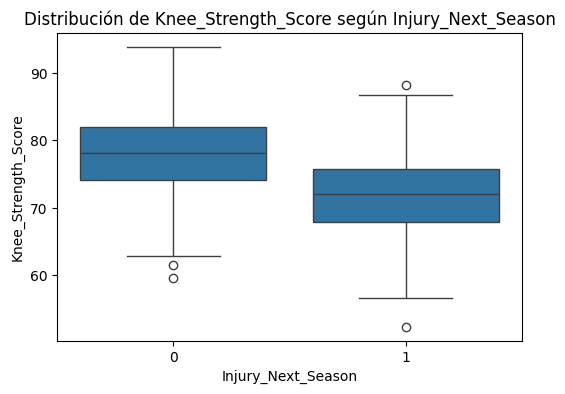


Resumen estadístico por categoría de target:
                    count   mean  median    min    max
Injury_Next_Season                                    
0                   400.0  77.96   78.07  59.54  93.90
1                   400.0  71.90   72.07  52.39  88.22


In [18]:
# --- Boxplot comparativo ---
plt.figure(figsize=(6,4))
sns.boxplot(x=target, y=var, data=df)
plt.title(f"Distribución de {var} según {target}")
plt.show()

# --- Estadísticas resumidas ---
stats = df.groupby(target)[var].describe()[["count","mean","50%","min","max"]]
stats = stats.rename(columns={"50%": "median"})  # renombrar para claridad
print("\nResumen estadístico por categoría de target:")
print(stats.round(2))

En la distribución de la variable Knee_Strength_Score se observa una diferencia clara entre los grupos:

- Los jugadores sin lesión (0) presentan una media de 77.96, mientras que los jugadores con lesión (1) tienen una media más baja, de 71.90.
- De manera similar, la mediana sigue la misma tendencia (78.07 vs 72.07), lo que refuerza la diferencia central entre ambos grupos.
- El rango de valores también varía, aunque ambos grupos presentan amplitud: los no lesionados tienen un rango entre 59.54 y 93.90, mientras que los lesionados se ubican entre 52.39 y 88.22.
- En el boxplot se observan valores atípicos (outliers) por fuera de los bigotes, indicando que existen algunos jugadores con fuerza de rodilla inusualmente baja o alta en comparación con la mayoría.

📌 Conclusión:
La fuerza de la rodilla (Knee_Strength_Score) parece estar asociada con la probabilidad de sufrir una lesión la próxima temporada, ya que los jugadores lesionados tienden a tener valores más bajos. Esto sugiere que podría ser una variable predictiva importante a considerar en un modelo de clasificación.

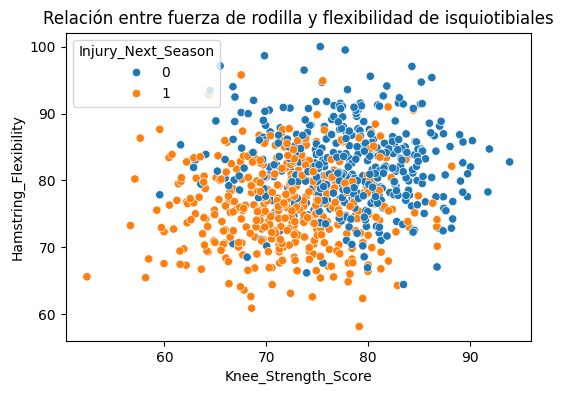

In [13]:
# --- Diagrama de dispersión opcional (si comparas 2 numéricas) ---
plt.figure(figsize=(6,4))
sns.scatterplot(x='Knee_Strength_Score', y='Hamstring_Flexibility', hue=target, data=df)
plt.title("Relación entre fuerza de rodilla y flexibilidad de isquiotibiales")
plt.show()

En el scatterplot se observa que existe una separación parcial entre las dos categorías del target. Los jugadores con lesión (1) tienden a agruparse en valores por debajo de 75, mientras que los jugadores sin lesión (0) se concentran en valores por encima de este umbral.

Sin embargo, aunque se aprecia esta tendencia, también se observa una superposición de puntos entre ambos grupos, lo cual dificulta establecer una separación totalmente clara entre lesionados y no lesionados únicamente con esta variable.

Asimismo, se identifican algunos valores atípicos (outliers), que aparecen dispersos y alejados del patrón general. Si bien no son muchos, estos casos extremos podrían tener relevancia clínica o técnica, y conviene analizarlos por separado.

En conclusión, la variable muestra cierta capacidad de diferenciación entre las clases, pero no es suficiente por sí sola para discriminar con precisión, lo que sugiere la necesidad de combinarla con otras variables dentro de un modelo predictivo.

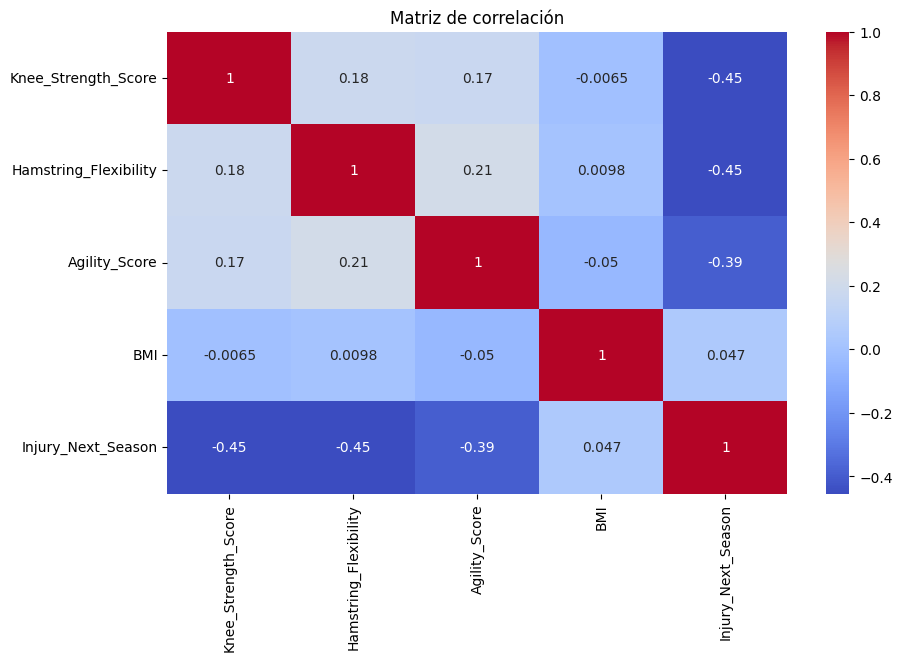

In [14]:
# --- Heatmap de correlación entre varias numéricas ---
plt.figure(figsize=(10,6))
sns.heatmap(df[['Knee_Strength_Score','Hamstring_Flexibility','Agility_Score','BMI','Injury_Next_Season']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


En la matriz de correlación se observa que la variable Knee_Strength_Score tiene una correlación de -0.45 con el target Injury_Next_Season. Esto indica que la relación es moderada y negativa, lo cual significa que mientras Knee_Strength_Score aumenta, la probabilidad de que el jugador tenga una lesión en la siguiente temporada (Injury_Next_Season = 1) disminuye.

De forma contraria, cuando el valor de Knee_Strength_Score es bajo, se incrementa la probabilidad de que el jugador presente lesión.

En términos prácticos, los jugadores con fuerza de rodilla más alta tienden a estar en la categoría 0 (sin lesión), mientras que aquellos con valores más bajos se concentran más en la categoría 1 (con lesión).

In [16]:
# --- Tablas de contingencia (si target es categórica binaria) ---
contingency = pd.crosstab(df[target], pd.cut(df[var], bins=4))
print("\nTabla de contingencia:")
contingency


Tabla de contingencia:


Knee_Strength_Score,"(52.35, 62.769]","(62.769, 73.146]","(73.146, 83.523]","(83.523, 93.9]"
Injury_Next_Season,,,,
0,2,77,251,70
1,30,211,148,11


La tabla muestra cómo se distribuyen las lesiones según distintos rangos de Knee_Strength_Score:

- En el rango más bajo (52.35 – 62.77) se observa que la mayoría de los jugadores pertenecen a la categoría 1 (con lesión), con 30 casos frente a solo 2 sin lesión. Esto indica que los puntajes bajos en fuerza de rodilla están fuertemente asociados con mayor probabilidad de lesión.
- En el rango (62.77 – 73.15), los casos de lesión (211) siguen siendo más frecuentes que los de no lesión (77), pero la diferencia empieza a equilibrarse más que en el rango anterior.
- En el rango (73.15 – 83.52) la tendencia se revierte: ahora los jugadores sin lesión (251) superan a los lesionados (148). Esto sugiere que a partir de este puntaje, la fuerza de rodilla empieza a ser un factor protector más claro.
- En el rango más alto (83.52 – 93.9) la diferencia es aún más marcada: 70 sin lesión frente a solo 11 con lesión, reforzando la idea de que valores altos de Knee_Strength_Score se asocian con menor riesgo de lesión.

📌 Conclusión: A medida que aumenta Knee_Strength_Score, la proporción de jugadores lesionados disminuye de forma consistente. Esto respalda lo que ya se observó en la correlación negativa (-0.45): la fuerza de rodilla funciona como un posible factor protector frente a lesiones.

📌 Resumen de hallazgos clave

- La variable Knee_Strength_Score presenta una correlación negativa moderada (-0.45) con el target Injury_Next_Season.
- El análisis gráfico (scatterplot y boxplot) muestra que a medida que aumenta la fuerza de rodilla, los jugadores tienden a pertenecer más a la categoría 0 (sin lesión).
- La tabla de contingencia confirma esta tendencia:
    - En los rangos bajos de fuerza, la mayoría de jugadores terminan lesionados.
    - En rangos altos, la proporción se invierte y predominan los jugadores sin lesión.

📌 Impacto en el contexto del conjunto de datos

Estos resultados sugieren que la fuerza de rodilla es un factor protector frente a lesiones en la siguiente temporada. En términos prácticos:

- Jugadores con puntajes bajos en fuerza de rodilla tienen mayor probabilidad de sufrir lesiones.
- Jugadores con puntajes altos tienden a mantenerse sin lesión.

Esto aporta un criterio objetivo que podría ser usado por preparadores físicos y equipos médicos para priorizar entrenamientos de fortalecimiento y planes de prevención en atletas con valores bajos.

📌 Posibles hipótesis y próximos pasos

- Hipótesis: Un incremento en la fuerza de rodilla reduce significativamente el riesgo de lesión en la temporada siguiente.
- Próximos pasos para análisis más profundo:
    - Aplicar modelos predictivos (ej. regresión logística) para cuantificar el efecto de Knee_Strength_Score en la probabilidad de lesión.
    - Incluir otras variables físicas o médicas para analizar si el efecto de la fuerza de rodilla se mantiene al controlar otros factores.
    - Evaluar la relación mediante análisis de supervivencia o seguimiento longitudinal, para ver cómo evoluciona el riesgo de lesión en el tiempo según el nivel de fuerza.
    - Probar técnicas de feature importance en modelos de machine learning, para confirmar si Knee_Strength_Score es una de las variables más influyentes en la predicción de lesiones.